In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%pip install seaborn
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import  RandomForestRegressor

In [3]:
df=pd.read_csv('data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df=df.fillna(value=0)

In [7]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
df.duplicated().sum()

0

<AxesSubplot:ylabel='Frequency'>

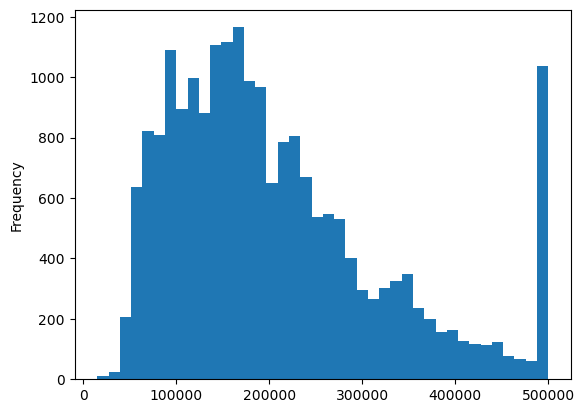

In [9]:
df['median_house_value'].plot(kind='hist',bins=40)

<AxesSubplot:ylabel='Frequency'>

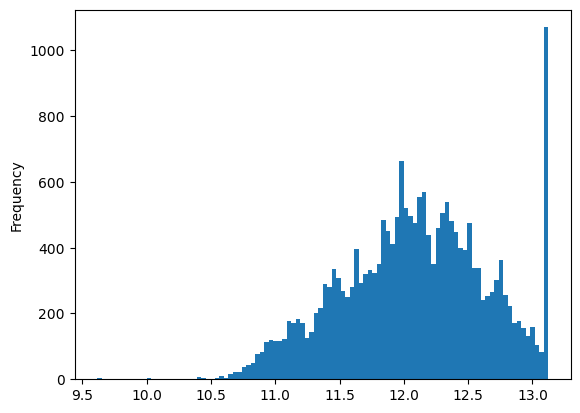

In [14]:
df['median_house_value'].plot(kind='hist',bins=100)

**check the outlier**

<AxesSubplot:ylabel='median_house_value'>

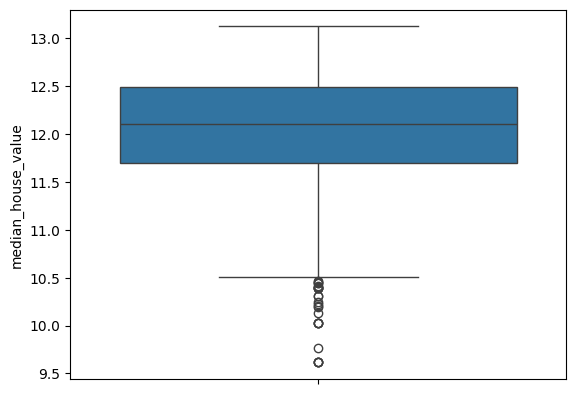

In [15]:
sns.boxplot(df['median_house_value'])

In [16]:
lower_bound = df['median_house_value'].quantile(0.05)  # to remove the outlier
upper_bound = df['median_house_value'].quantile(0.95)

df['median_house_value'] = df['median_house_value'].clip(lower=lower_bound, upper=upper_bound)


<AxesSubplot:ylabel='median_house_value'>

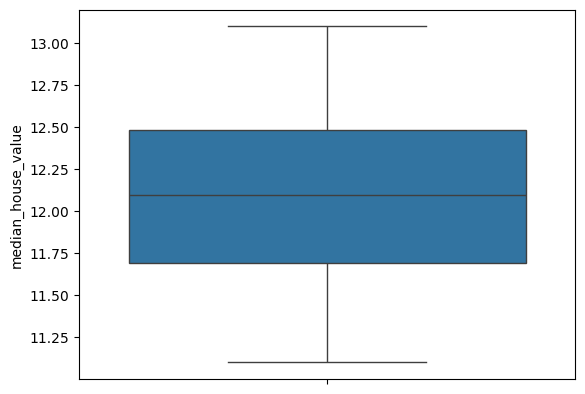

In [17]:
sns.boxplot(df['median_house_value'])

<ipython-input-18-2c1d055d4312>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


<AxesSubplot:>

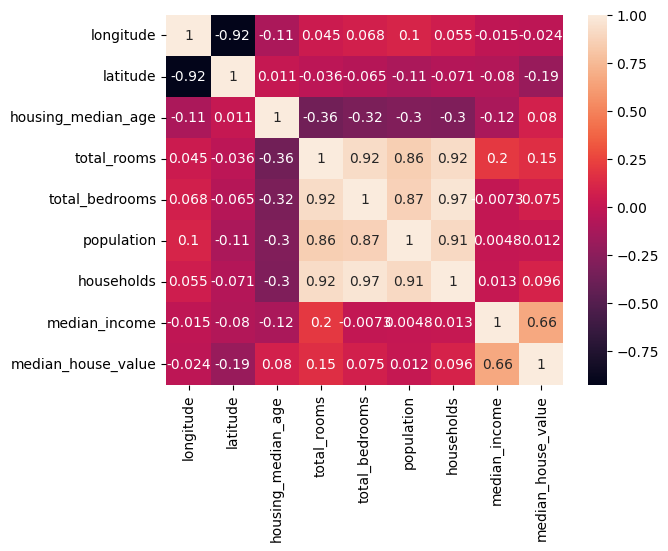

In [18]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)

**Plot latitude and longitude with median house value**

Text(0.5, 1.0, 'Latitude and Longitude with Median House Value')

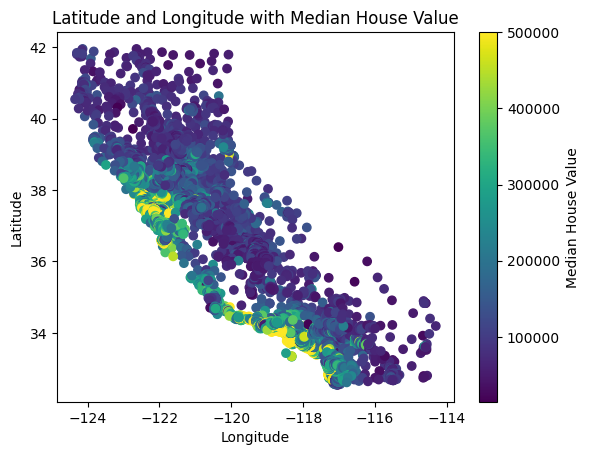

In [10]:

plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'])
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude and Longitude with Median House Value')


In [11]:
np.random.seed(123)
df['median_house_value']=np.log1p(df['median_house_value']) # apply log to median_house_value because it left left skewed
df['median_house_value'].head()

0    13.022766
1    12.789687
2    12.771673
3    12.740520
4    12.743154
Name: median_house_value, dtype: float64

**Split the data**

In [12]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)

In [13]:
y_train=df_train.median_house_value
y_test=df_test.median_house_value
y_val=df_val.median_house_value
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)



(12384,)
(4128,)
(4128,)


In [14]:
del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

In [15]:
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(12384, 9)
(4128, 9)
(4128, 9)


**dealing with categorical data**

dv=DictVectorizer(sparse=False)
train_dict=df_train.to_dict(orient='records')
x_train=dv.fit_transform(train_dict)

val_dict=df_val.to_dict(orient='records')
x_val=dv.transform(val_dict)

test_dict=df_test.to_dict(orient='records')
x_test=dv.transform(val_dict)

In [25]:
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'ocean_proximity=ISLAND',
       'ocean_proximity=NEAR BAY', 'ocean_proximity=NEAR OCEAN',
       'population', 'total_bedrooms', 'total_rooms'], dtype=object)

**train Decision Tree model**

In [17]:
dt=DecisionTreeRegressor(random_state=1,max_depth=1)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_val)
log_error=mean_squared_error(y_pred,y_val)
log_RMSE=np.sqrt(log_error)
print("log RMSE is:",log_RMSE)


non_log_error=mean_squared_error(np.exp(y_pred),np.exp(y_val))
non_log_RMSE= np.sqrt(non_log_error)
print( "non log RMSE is :",non_log_RMSE)


log RMSE is: 0.46783724529735593
non log RMSE is : 103051.96042910985


In [40]:
rf=RandomForestRegressor(max_depth=1,n_estimators=10)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_val)


log_error=mean_squared_error(y_pred,y_val)
log_RMSE=np.sqrt(log_error)
print("log RMSE is:",log_RMSE)


non_log_error=mean_squared_error(np.exp(y_pred),np.exp(y_val))
non_log_RMSE= np.sqrt(non_log_error)
print( "non log RMSE is :",non_log_RMSE)

log RMSE is: 0.46783299697805397
non log RMSE is : 103030.63805329056


In [18]:
importance=dt.feature_importances_
importance
most_important_feature_index = np.argmax(importance)
most_important_feature_index
imop=df_train.columns[6]
imop

'households'

**tning the  Random Forest  model**

In [20]:
score=[] # tuning the n_estimators
for i in range(10,200,10):
    random_forest = RandomForestRegressor(n_estimators=i, random_state=1, n_jobs=-1)
    random_forest.fit(x_train,y_train)
    
    
    y_pred=random_forest.predict(x_val)
    error=mean_squared_error(y_pred,y_val)
    rmse = np.sqrt(error)
    score.append((i,rmse))
     

Text(0.5, 1.0, 'n_estimators VS RMSE')

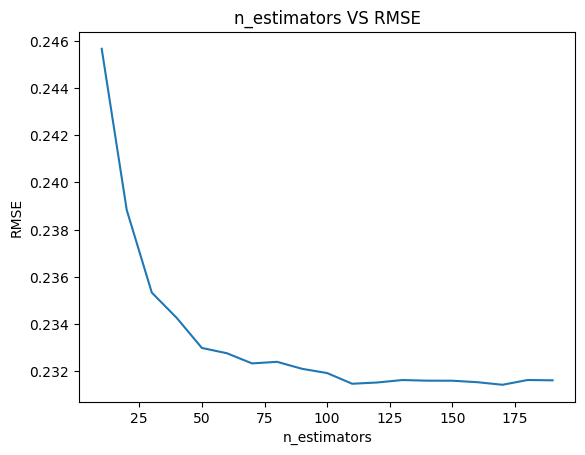

In [23]:
df_scores=pd.DataFrame(score,columns=['n_estimators','RMSE'])
plt.plot(df_scores.n_estimators,df_scores.RMSE)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('n_estimators VS RMSE')

In [ ]:
scores=[] #tuning the max_depth
for d in  [5,10, 15, 20, 25]:
    random_forest = RandomForestRegressor(n_estimators=150, random_state=1, n_jobs=-1,max_depth=d)
    random_forest.fit(x_train,y_train)
    
    y_pred=random_forest.predict(x_val)
    error=mean_squared_error(y_pred,y_val)
    rmse = np.sqrt(error)
    scores.append((d,rmse))

     

Text(0.5, 1.0, 'max_depth VS RMSE')

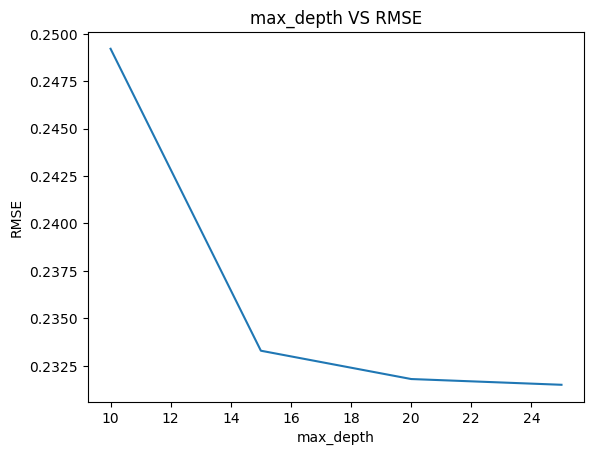

In [29]:
df_scores=pd.DataFrame(scores,columns=['max_depth','RMSE'])
plt.plot(df_scores.max_depth,df_scores.RMSE)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('max_depth VS RMSE')

In [32]:
random_forest = RandomForestRegressor(n_estimators=170, random_state=1, n_jobs=-1,max_depth=20)
random_forest.fit(x_train,y_train)


y_pred=random_forest.predict(x_val)

log_error=mean_squared_error(y_pred,y_val)
log_RMSE=np.sqrt(log_error)
print("log RMSE is:",log_RMSE)

non_log_error=mean_squared_error(np.exp(y_pred),np.exp(y_val))
non_log_RMSE= np.sqrt(non_log_error)
print( "non log RMSE is :",non_log_RMSE)

log RMSE is: 0.23171150770917162
non log RMSE is : 49387.01844318741


**plot the feature importance**

In [33]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.feature_names_
df_importances['importance'] = random_forest.feature_importances_
df_importances.sort_values(by='importance',ascending=False)

,feature,importance
4,median_income,0.355370
6,ocean_proximity=INLAND,0.316452
2,latitude,0.101147
3,longitude,0.097141
1,housing_median_age,0.034192
10,population,0.030070
12,total_rooms,0.022128
11,total_bedrooms,0.018445
0,households,0.017683
9,ocean_proximity=NEAR OCEAN,0.004686


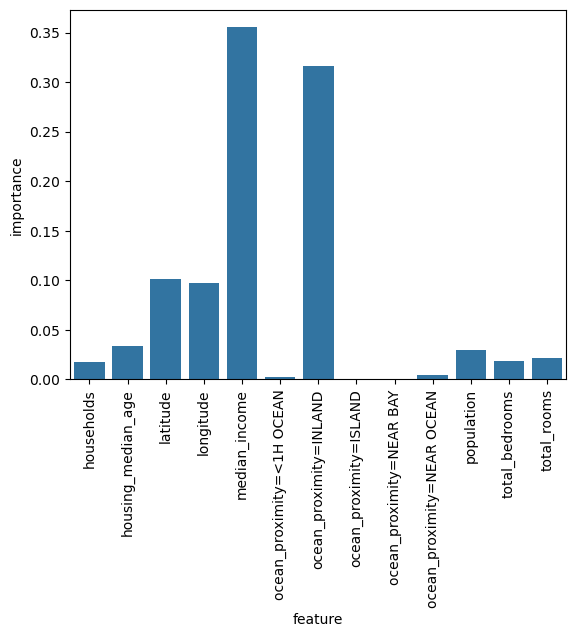

In [34]:
sns.barplot(x=df_importances.feature,y=df_importances.importance)
plt.xticks(rotation=90);